In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as obsen_jbS
obsen_jb = obsen_jbS.read_csv('/content/drive/MyDrive/March2023/Identifying obsence job posts using NLP and machine learning/obsen_jb_NLP.csv')
obsen_jb

,Advertisements,Category
0,seeking models publication major men adult mag...,Illegitimate
1,seek reliable models experiences art nude erot...,Illegitimate
2,looking new existing talent appear variety mod...,Illegitimate
3,looking female models adult themed shoots prov...,Illegitimate
4,established photo video professional looking n...,Illegitimate
...,...,...
205,essity global company paving way towards digit...,Legitimate
206,role dedicated lead management nurturing leads...,Legitimate
207,primary function accountant reporting assist a...,Legitimate
208,essity leading global hygiene health company d...,Legitimate


In [3]:
obsen_jb['Category   '].value_counts()

Illegitimate     119
Legitimate        91
Name: Category   , dtype: int64

In [4]:
import warnings as obsen_wng
obsen_wng.filterwarnings("ignore")
from sklearn.feature_extraction.text import TfidfVectorizer as obsen_jb_TFVEC

obsen_jbX = obsen_jb.drop('Category   ',axis=1)
obsen_jbY = obsen_jb['Category   ']
obsen_jb_TFVEC = obsen_jb_TFVEC(analyzer='char', ngram_range= (1,1))
obsen_jbX = obsen_jb_TFVEC.fit_transform(obsen_jb['Category   '].values.astype('U')).toarray()
obsen_jbX.shape

(210, 8)

In [5]:
obsen_jbX

array([[0.2       , 0.2       , 0.4       , ..., 0.4       , 0.2       ,
        0.4       ],
       [0.2       , 0.2       , 0.4       , ..., 0.4       , 0.2       ,
        0.4       ],
       [0.2       , 0.2       , 0.4       , ..., 0.4       , 0.2       ,
        0.4       ],
       ...,
       [0.24253563, 0.24253563, 0.48507125, ..., 0.24253563, 0.24253563,
        0.48507125],
       [0.24253563, 0.24253563, 0.48507125, ..., 0.24253563, 0.24253563,
        0.48507125],
       [0.24253563, 0.24253563, 0.48507125, ..., 0.24253563, 0.24253563,
        0.48507125]])

In [6]:
obsen_jbY.shape

(210,)

In [7]:
obsen_jb['Category   '].value_counts()

Illegitimate     119
Legitimate        91
Name: Category   , dtype: int64

Data Splitting: 60% Training, 20% Testing & 20% Validation

In [8]:
from sklearn.model_selection import train_test_split as obsen_jb_TRNTESPL

obsen_jb_XTRN, obsen_jb_XTES, obsen_jb_YTRN, obsen_jb_YTES = obsen_jb_TRNTESPL(obsen_jbX, obsen_jbY, test_size=0.4, random_state=10)
obsen_jb_XVAL, obsen_jb_XTES, obsen_jb_YVAL, obsen_jb_YTES = obsen_jb_TRNTESPL(obsen_jb_XTES, obsen_jb_YTES, test_size=0.5, random_state=10)

Best Parameters - Decision Tree Classifier

In [9]:
from sklearn.model_selection import GridSearchCV as obsen_jb_GRPRM
from sklearn.tree import DecisionTreeClassifier as obsen_jb_DecTR

obsen_Params = {
              'criterion': ['gini','entropy','log_loss'],
              'max_depth':list(range(7)),
              'splitter': ['best','random'],
              'max_features':['sqrt','auto','log2'],
              'min_weight_fraction_leaf': [0.0,0.1,0.2]
               }
obsen_jbMod = obsen_jb_DecTR(random_state=1)
obsen_jbMod = obsen_jb_GRPRM(obsen_jbMod, obsen_Params,
                         cv=2,
                         verbose=1)
obsen_jbMod.fit(obsen_jbX, obsen_jbY)
print("Obscene Parameters : ", obsen_jbMod.best_params_)
print("Onscene Score      : ", obsen_jbMod.best_score_)

Fitting 2 folds for each of 378 candidates, totalling 756 fits
Obscene Parameters :  {'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}
Onscene Score      :  1.0


## Predicting Validation Data

In [10]:
from sklearn.metrics import classification_report as obsen_jb_CL
from sklearn.metrics import confusion_matrix as obsen_jbCMX
from sklearn.metrics import ConfusionMatrixDisplay as obsen_jbDSP
import time as obsenTYM

obsen_T1 = obsenTYM.time()
obsen_M1 = obsen_jb_DecTR(max_features='sqrt', max_depth=1, criterion='gini', min_weight_fraction_leaf=0.0, splitter='best')
obsen_M1.fit(obsen_jb_XTRN,obsen_jb_YTRN)
obsen_T2 = obsenTYM.time()
print("\n Training Duration - DTree:", obsen_T2-obsen_T1,"\n")

obsen_T1 = obsenTYM.time()
obsen_PR = obsen_M1.predict(obsen_jb_XVAL)
print(obsen_jb_CL(obsen_jb_YVAL,obsen_PR))
obsen_T2 = obsenTYM.time()
print("\n Validation Duration - DTree:", obsen_T2-obsen_T1,"\n")


 Training Duration - DTree: 0.001851797103881836 

               precision    recall  f1-score   support

Illegitimate        1.00      1.00      1.00        25
  Legitimate        1.00      1.00      1.00        17

     accuracy                           1.00        42
    macro avg       1.00      1.00      1.00        42
 weighted avg       1.00      1.00      1.00        42


 Validation Duration - DTree: 0.017056941986083984 



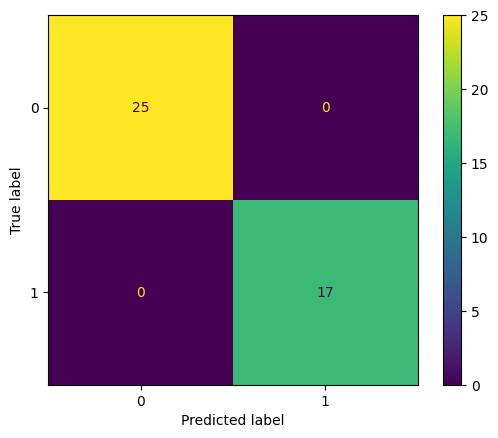

In [11]:
obsen_jbMRX = obsen_jbCMX(obsen_jb_YVAL,obsen_PR)
obsen_jbMRXD = obsen_jbDSP(confusion_matrix = obsen_jbMRX, display_labels = [0, 1])
obsen_jbMRXD.plot()

## Predicting Test Data

In [12]:
obsen_T1 = obsenTYM.time()
obsen_PR = obsen_M1.predict(obsen_jb_XTES)
print(obsen_jb_CL(obsen_jb_YTES,obsen_PR))
obsen_T2 = obsenTYM.time()
print("\n Testing Duration - DTree:", obsen_T2-obsen_T1,"\n")

               precision    recall  f1-score   support

Illegitimate        1.00      1.00      1.00        24
  Legitimate        1.00      1.00      1.00        18

     accuracy                           1.00        42
    macro avg       1.00      1.00      1.00        42
 weighted avg       1.00      1.00      1.00        42


 Testing Duration - DTree: 0.01420736312866211 



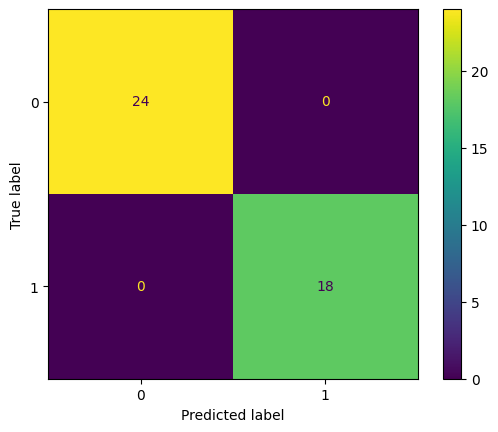

In [13]:
obsen_jbMRX = obsen_jbCMX(obsen_jb_YTES,obsen_PR)
obsen_jbMRXD = obsen_jbDSP(confusion_matrix = obsen_jbMRX, display_labels = [0, 1])
obsen_jbMRXD.plot()

Decision Tree Classifier performs 100% accuracy in both validation and testing of Obscene Job posts.

* Training Duration   - DTree: 0.001851797103881836
* Validation Duration - DTree: 0.017056941986083984
* Testing Duration    - DTree: 0.01420736312866211